# Final Project Submission

* Student name: Maria Galdina
* Student pace: full time
* Scheduled project review date/time: Jan 22 at 2:00 - 2:30 pm PST
* Instructor name: Rafael Carrasco
* Blog post URL: https://galdina.github.io/first_project_denial_anger_bargaining_depression_acceptance

## Throughout the project, I researched the provided movie dataset to answer questions:
----
**What major metrics for succesfull movie?**
* What genre it should be?
* How much money investors should spend for movie?
* How long people can be focus on our movie?

## Let's start!

# Importing necessary libraries, add connection to the database

I started working with zipped cvs files. I unzipped files using terminal and command *gunzip*. Then I converted them into database (all work in **Reading information.ipynb**) and check for duplicates, empty values or rows (all my work was shown in **Studing and clearing**).

## *Some code with information about files*

In [3]:
# import libraries
import sqlite3
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
#add connection to the database
conn = sqlite3.connect("movies_database.sqlite")
cur = conn.cursor()

In [5]:
#check tables which we have for work
for row in cur.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row)

('tmdb_movies',)
('imdb_title_crew',)
('tn_movie_budgets',)
('imdb_title_ratings',)
('imdb_name_basics',)
('imdb_title_principals',)
('imdb_title_akas',)
('bom_movie_gross',)
('imdb_title_basics',)
('rt_reviews',)
('rt_movie_info',)


After I cleaned and checked all the tables, I decided to work with three of them.
**tmdb_movies** has important movie matrices: *genres, popularity, release date, vote average* \
**tn_movie_budgets** has: *production budget, domestic gross, worldwide gross* \
**imdb_title_basics** has: *runtime minutes* 

--------
 * Work with tables. Code example.

In [7]:
# Throughout the project I get research information from the tables. 
# This is code example, how do I get the table I need.
# Join two tables where each movie has runtime less than 250 minutes
# it's table I sorted by popularity arranged from largest to smallest.
# For my reseach I take only top 200 movies
cur.execute('''SELECT *
               FROM imdb_title_basics imdb
               JOIN tmdb_movies tmdb
               ON imdb.original_title = tmdb.original_title
               WHERE runtime_minutes < 250
               ORDER BY popularity DESC
               LIMIT 200
               ''')
runtime = pd.DataFrame(cur.fetchall()) 
runtime.columns = [i[0] for i in cur.description]
runtime.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
1,tt2911666,John Wick,John Wick,2014,101.0,"Action,Crime,Thriller",11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
2,tt4633694,Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse,2018,117.0,"Action,Adventure,Animation",23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048


## 1. Exploring movie genres

I want to find the dependence of the popularity of films on their genre and budget. To do this, we work with several tables **tn_movie_budgets** and **tmdb_movies**

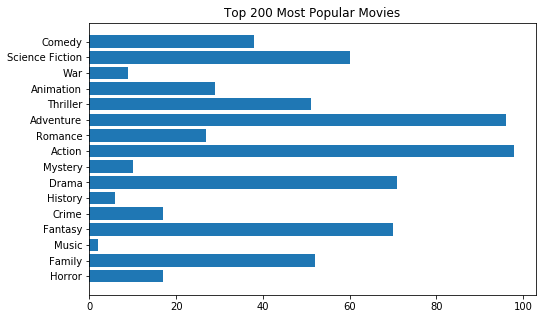

**The most popular genres are Action, Adventure, and Drama followed closely by Sci-Fi and Fantasy. Comedy and Family movies try to catch up**

----------------
Top 5 Genres
----------------
* Action: 98
* Adventure: 96
* Drama: 71
* Fantasy: 70
* Science Fiction: 60

-----------------

## How worldwide movie gross dependence on genre?

Works with the same tables. 

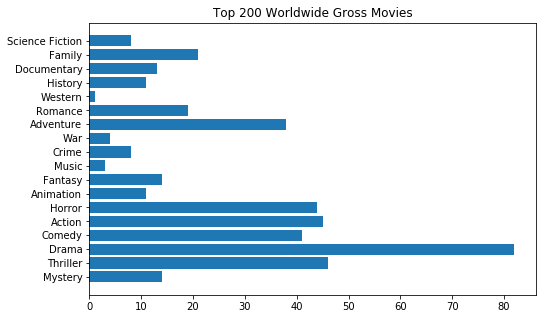

Here Drama seem to be the most popular then Thriller and Action close behind. Horror tries to catch up. However, unlike the most profitable movies, Comedy and Adventure also rank fairly high.

----------------
Top 5 Genres who can bring good gross
----------------
* Drama: 82
* Thriller:46
* Action: 45
* Horror: 44
* Comedy: 41
-----------------

## Summary about movie genre

If you want to create a very popular movie, his genre should be *Action, Adventure, Drama, Fantasy of Science Fiction.*

When you want to earn more then choose *Drama*. People love to be involde into heros lives and share their experiences.

------

# 2. How much is popular movie?

In this part of my project I try to find best budget value for popular movie. How much we should spend for better result.

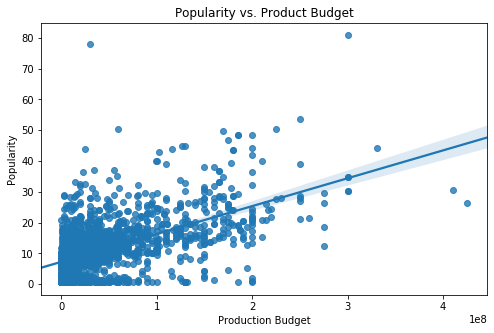


In [9]:
#connect tables tmdb_movies and tn_movie_budgets and put result  into DataFrame
cur.execute('''SELECT tmdb_movies.*, production_budget, domestic_gross, worldwide_gross 
               FROM tn_movie_budgets 
               JOIN tmdb_movies
               ON tn_movie_budgets.movie = tmdb_movies.original_title
            ''')
all_movies = pd.DataFrame(cur.fetchall())
all_movies.columns = [i[0] for i in cur.description]
# change types for production_budget,domestic_gross, and worldwide_gross from string to integer for better work
all_movies['production_budget'] = all_movies['production_budget'].str.replace("$","").str.replace(",","").astype('int')
all_movies['domestic_gross'] = all_movies['domestic_gross'].str.replace("$","").str.replace(",","").astype('int')
all_movies['worldwide_gross'] = all_movies['worldwide_gross'].str.replace("$","").str.replace(",","").astype('int')
# calculate Correlation Coefficients
np.corrcoef(all_movies['production_budget'], all_movies['popularity'])

array([[1.        , 0.56529103],
       [0.56529103, 1.        ]])

## Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated. Our correlation coefficients equals 0.56529103. That mean: dependence is poorly expressed
------
After I checked some basic statistical details like percentile, mean, std etc. I decide to check budget situation in top 200 popular movie, except 3 most expensive movies:

In [23]:
# find out most expensive movie
#calculate mean value for budget
mean_b = all_movies.production_budget.mean()
#calculate max value of budget
max_b = all_movies.production_budget.max()
#print this values
print(f"mean value for production budget", mean_b)
print(f"mean value for production budget", max_b)
all_movies[(all_movies['production_budget']<=max_b) & (all_movies['production_budget']>=mean_b)].sort_values(by=['production_budget'],axis=0).tail(5)

mean value for production budget 37901080.82728843
mean value for production budget 425000000


,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
4,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510,300000000,229024295,655945209
3,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,300000000,678815482,2048134200
2,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457,330600000,459005868,1403013963
1,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,410600000,241063875,1045663875
0,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,425000000,760507625,2776345279


## Let's check some basic statistical details about 'Top 200 Movies by Popularity'

In [25]:
# here we select top 200 most populat movie, except 3 most expensive
cur.execute('''SELECT tmdb.*, production_budget, domestic_gross, worldwide_gross 
               FROM tmdb_movies tmdb
               JOIN 
               (SELECT movie, 
                CAST(REPLACE(SUBSTR(production_budget,2),',','')as INTEGER) as production_budget, 
                CAST(REPLACE(SUBSTR(domestic_gross,2),',','')as INTEGER) as domestic_gross, 
                CAST(REPLACE(SUBSTR(worldwide_gross,2),',','')as INTEGER) as worldwide_gross 
                FROM tn_movie_budgets) tn
               ON tn.movie = tmdb.original_title 
               WHERE production_budget < 330600000
               ORDER BY popularity DESC
               LIMIT 200
            ''')
top_movies = pd.DataFrame(cur.fetchall())
top_movies.columns = [i[0] for i in cur.description]
top_movies.head(1)

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,300000000,678815482,2048134200


----
**'Top 200 Movies by Popularity'**

In [27]:
# here I calculate basic statistical details
print('Top 200 Movies by Popularity')
print('Max Budget:',top_movies['production_budget'].max())
print('Min Budget:',top_movies['production_budget'].min())
print('Mean Budget:',top_movies['production_budget'].mean())
print('Median Budget:',top_movies['production_budget'].median())

Top 200 Movies by Popularity
Max Budget: 300000000
Min Budget: 2900000
Mean Budget: 114726000.0
Median Budget: 106000000.0


---------
**How we can see by Correlation Coefficients - high budget doesn't garante high extrimly popularity. Let look for some factors: Budget vs Worldwide Gross.**

For example, I found a strong correlation between Budget and Worldwide Gross.

In [29]:
np.corrcoef(top_movies['production_budget'], top_movies['worldwide_gross'])

array([[1.        , 0.70492133],
       [0.70492133, 1.        ]])

A coefficient of correlation of 0.8 indicates a strong correlation between the independent variable and the dependent variable. Our correlation coefficients equals 0.70492133 (almost there). That mean: if we spend a some money, it bring us some more. Let's see a graph: 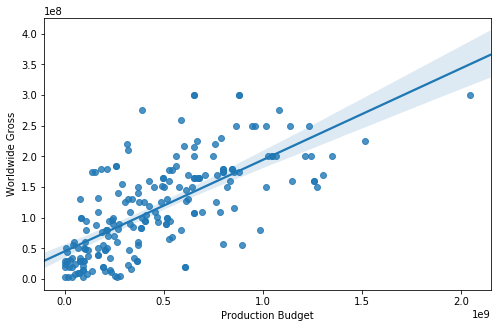

## Summary about movie Budget

All coefficients and statistical details show us that if your spend around $115m your movie has a good chance to be a popular and sure your can get your money back with percents.

---------

# 3. What studios tend to make the most popular movies?

I made a next steps to find which studio released more populer movies: 
1. Joined two tables: one with information about movie popularity, second with studios names
2. Converted all the necessary information into the desired format
3. Ordered by popularity desc
4. Take only first 200 movies
5. Order studios by count of movies

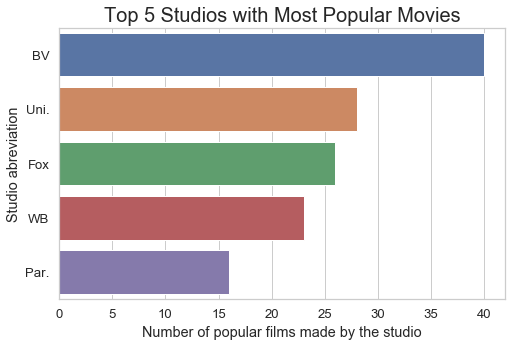

The graph shows us top 5 most productive studios:
1. **Buena Vista**
2. Universal
3. Fox
4. Warner Bros.
5. Paramount

## Summary about movie Studios

It's look like Buena Vista studios created more popular movies than others.

-----------

# 4. Is runtime affects popylarity?

To identify the dependencies between time and popularity, I performed several calculations and found statistical details: max, min and mean for movies length.

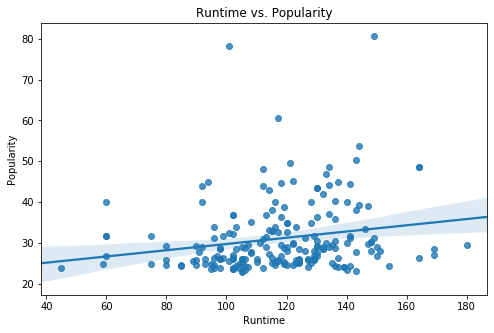

**For Top 200 popular movies:**
1. min runtime = 102 min
2. max runtime = 180 min
3. mean runtime = 117 min

When I checked correlation coefficient, it was 0.20 
Low correlation coefficient say us - the runtime of the movie has very little effect on its popularity.

Next step in research runtime of popular movie was - separeted movies by quantiles and check where we have more movies.
1. Runtime from 45 min to 102 min - 42 movies
2. Runtime from 102 min to 118 min - 56 movies
3. Runtime from 118 min to 132 min - 49 movies
4. Runtime from 132 min to 180 min - 53 movies
 
## Summary about movie Runtime

It shows that the most popular  movies average around the 120 minute mark.

# Final Thoughts

A study of the data showed interesting, but in most cases expected results. The project turned out to consider the dependence of popularity on the genre of the film, its budget, studio and duration.
Last word:
**Create a dramas in the studio Bueno Viste no longer than 120 minutes with a budget of $115m**

# Future Analisys

1. Choose the best cast/director for the popular movie:
*analyze the film crew of popular movies, how the profit   from films depends on the director;*
2. When is the better time for  movie release:
*find out the best day and month for movie release, what is the relationship between release day and popularity, depending on the genre*

# Some intresting correlation between movie's matrices

## How day of week affects to popularity 

I explored the movie popularity trend over years, from 1930 to 2020. I computed the mean of popularity in each year, and then plotted line chart to show the trend. Moreover, since the popularity has no upper bound, in case the mean of popularity was affected by the higher rating, I also computed the median for analyzing this question.

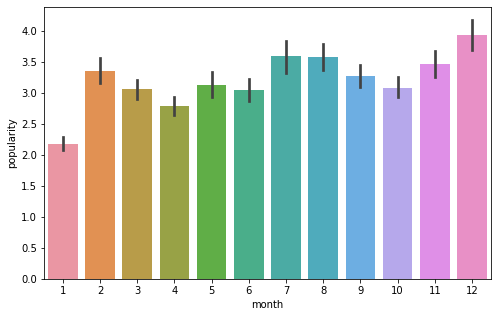

In [16]:
# let's see in which month released most popular movies
plt.figure(figsize=(8, 5))
sns.barplot(x='month', y='popularity', data=movies)
plt.show()

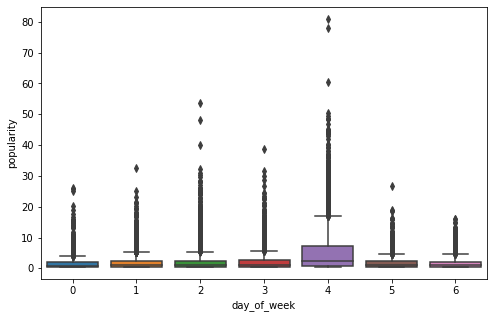

In [25]:
# let's see in which day of week released most popular movies
plt.figure(figsize=(8, 5))
sns.boxplot(x='day_of_week', y='popularity', data=movies)
plt.show()

How we can see best month for release December, best day for release - Friday!